In [39]:
# import important libraries
import pandas as pd 
from matplotlib import dates
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## **Walmart** 
walmart is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United states.

<div>
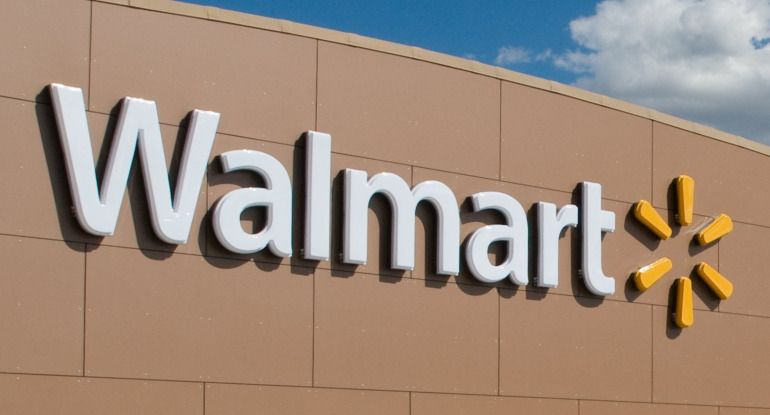
</div>

### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

### Problem Statement

My objective here is to answer some quesitions and Build algorithm to predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

In [40]:
# import the dataset
df = pd.read_csv('Walmart_Store_sales.csv')

In [41]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Understanding Dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [43]:
df.max() #Finds the Max value in each column 

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

In [44]:
# checking for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Preparation Dataset

In [45]:
# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [47]:
# Splitting Date column
df_d = df['Date']
df["Day"]= pd.DatetimeIndex(df_d).day
df['Month'] = pd.DatetimeIndex(df_d).month
df['Year'] = pd.DatetimeIndex(df_d).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


#### QUESTION 1 :- Which store has maximum sales in this dataset?

In [48]:
df.loc[df['Weekly_Sales'] ==  df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724,24,12,2010


From the table above we see that Store 14 has the maximum weekly sales.

#### QUESTION 2 :- Which store has maximum standard deviation?

In [49]:
# grouping by store and finding the standard deviation and mean of each store
max_std=pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales':['std','mean']}))
max_std = max_std.reset_index()

# finding the store with max standard deviation
max_std.loc[max_std[('Weekly_Sales','std')]==max_std[('Weekly_Sales','std')].max()]

Store   Weekly_Sales              
                    std          mean
13    14  317569.949476  2.020978e+06

From From the table above we can see that sales in store 14 very a lot.

#### QUESTION 3 :- Which store/s has good quarterly growth rate in Q3’2012?

In [69]:
# converting the data type of date column to dateTime 
df['Date'] = pd.to_datetime(df['Date'])

# writing the start and end date of Q3 and Q2
Q3_date_from = pd.Timestamp(2012,7,1)
Q3_date_to = pd.Timestamp(2012,9,30)
Q2_date_from = pd.Timestamp(2012,4,1)
Q2_date_to = pd.Timestamp(2012,6,30)

# collecting the data of Q3 and Q2 from original dataset.
Q2data=df[(df['Date'] > Q2_date_from) & (df['Date'] < Q2_date_to)]
Q3data=df[(df['Date'] > Q3_date_from) & (df['Date'] < Q3_date_to)]

# get the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)

# get the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

# merge Q2 and Q3 data on Store as a similar column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

In [70]:
# Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [71]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


From above tables we can observe that Q3 growth rate is in losses .
the Store 16 has the least loss of 3% compared the other stores and store 14 has highest loss of 18%.

#### QUESTION 4:- Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?

In [56]:
# finding the mean sales of non holiday and holiday 
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

### Build  prediction models to forecast demand

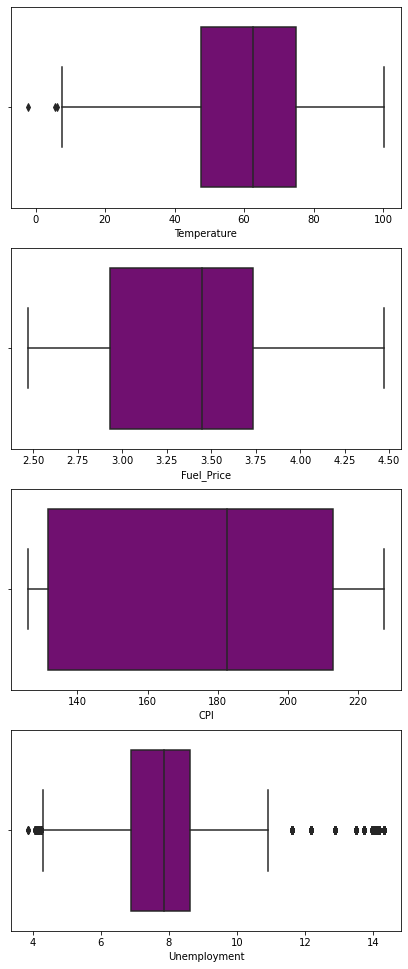

In [57]:
# looking if there is outliers 
fig, axs = plt.subplots(4,figsize=(7,17))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sb.boxplot(df[column], ax=axs[i], color= 'purple')

In [58]:
# drop the outliers     
df_new = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
df_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


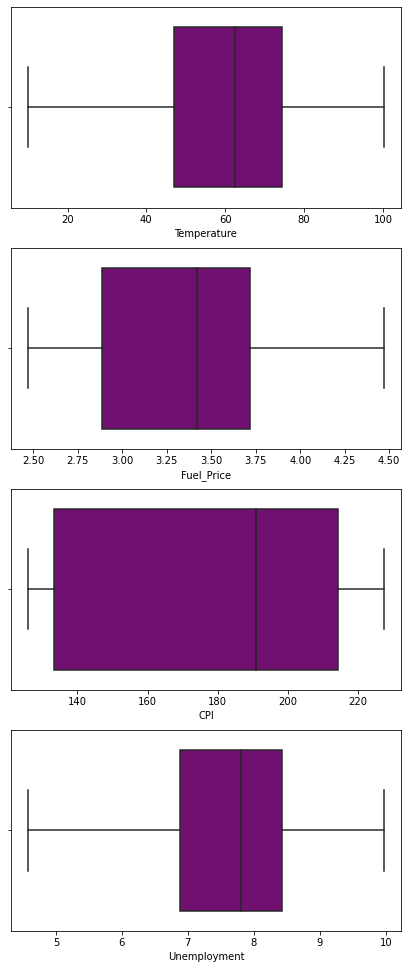

In [59]:
# last check for outliers 
fig, axs = plt.subplots(4,figsize=(7,17))
X = df_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sb.boxplot(df_new[column], ax=axs[i], color= 'purple')

### Bulding the model

In [60]:
# Select features and target variables
X = df_new[['Store','Fuel_Price','CPI','Unemployment']]
y = df_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4526, 4), (1132, 4), (4526,), (1132,))

In [62]:
# Linear Regression model
reg_mod = LinearRegression()
reg_mod.fit(X_train, y_train)
y_pred = reg_mod.predict(X_test)

In [63]:
print('Linear Regression:')
print('Accuracy:', reg_mod.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Linear Regression:
Accuracy: 12.354668590425288
Mean Absolute Error: 442641.904254096
Mean Squared Error: 285106270170.6685
Root Mean Squared Error: 533953.4344591001


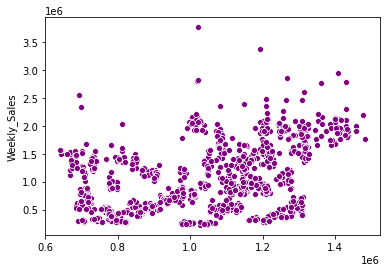

In [64]:
sb.scatterplot(y_pred, y_test, color= 'purple');

In [65]:
# Random Forest Regressor
rf_mod = RandomForestRegressor(n_estimators = 400,max_depth=15)        
rf_mod.fit(X_train,y_train)
y_pred=rf_mod.predict(X_test)

In [66]:
print('Random Forest Regressor:')
print('Accuracy:',rf_mod.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest Regressor:
Accuracy: 93.44019683090524
Mean Absolute Error: 73929.37441090755
Mean Squared Error: 21304119900.14437
Root Mean Squared Error: 145959.30905613513


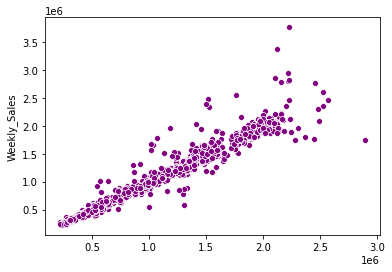

In [67]:
sb.scatterplot(y_pred, y_test, color= 'purple');

## Conclusion:

In this project, I tried to analyze and make model to predict demand accurately and ingest their factors. First I explored the data and see what I have to change before start the analysis. I didn't find anything to clean and the data looks good for me. Then I did some exploratory analysis on the data. From that analysis I found out that `Store 14` has the maximum weekly sales.and we infer that `Q3` growth rate is in losses. And the `Store 16` has the least loss of 3% compared the other stores and store 14 has highest loss of 18%. and we found that the mean sales of thanks giving is more than the non holiday weekly sales. And Random Forest Regressor has the heighest accuarcy to predict the demand retail with `94.5`.

### Improvements:

- Trying more advanced predictive models.
- Trying to get newest and more data like location, offers and time. All these data can help us know how to increase our sales. Also having more data is always good think to help us improve our model results.